##Model 1 - CNN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import preprocess_input


# Set the paths to your dataset folders
data_dir = '/content/drive/MyDrive/divided_datathon_dataset'
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'val')
test_dir = os.path.join(data_dir, 'test')

# Define image dimensions and other parameters
img_width, img_height = 224, 224
batch_size = 32
num_classes = 4  # Number of tumor types

# Preprocess the images using data augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


validation_datagen = ImageDataGenerator(rescale=1.0/255.0, preprocessing_function=preprocess_input,)

test_datagen = ImageDataGenerator(rescale=1.0/255.0, preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Build the DNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
num_epochs = 100
history = model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=validation_generator
)

# Save the trained model
model.save('tumor_detection_multiclass_model.h5')

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plotting train/validation curves
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(num_epochs)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_accuracy, label='Train Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Train and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Train and Validation Loss')

plt.tight_layout()
plt.show()


Found 1938 images belonging to 4 classes.
Found 647 images belonging to 4 classes.
Found 649 images belonging to 4 classes.
Epoch 1/100
10/61 [===>..........................] - ETA: 33s - loss: 13.8130 - accuracy: 0.2908

KeyboardInterrupt: ignored

## Model2 - CNN

In [ ]:
from tensorflow.keras.optimizers import Adam, Nadam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger

In [ ]:
lr = 1e-4

file_path = "/"
model_path = 'best_model.h5'
optimizer = Adam(lr)

csv_logger = CSVLogger(f"{file_path}cnn_{batch_size}.csv", append=False)
checkpoint = ModelCheckpoint(model_path, verbose=1, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=5, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=False)
callbacks = [csv_logger, checkpoint, reduce_lr, early_stopping]

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input

#Augmenting the training dataset

traingen = ImageDataGenerator(
                 rescale=1./255,
                 shear_range= 0.2,
                 zoom_range = 0.3,
                 width_shift_range = 0.2,
                 height_shift_range  =0.2,
                 fill_mode = "nearest",

                 )

valgen = ImageDataGenerator(# rescale the images to 1./255
                rescale = 1./255,
)

#Augmenting the testing dataset
testgen = ImageDataGenerator(# rescale the images to 1./255
                rescale = 1./255,

                )


trainds = traingen.flow_from_directory(train_dir,
                                       target_size = (130,130),
                                       seed=123,
                                       batch_size  = 16,
                                      )
valds = traingen.flow_from_directory(validation_dir,
                                     target_size = (130,130),
                                     seed=123,
                                     batch_size  = 16,
                                      )
testds = testgen.flow_from_directory(test_dir,
                                     target_size = (130,130),
                                     seed=123,
                                     batch_size  = 16,
                                     shuffle=False)


Found 1938 images belonging to 4 classes.
Found 647 images belonging to 4 classes.
Found 649 images belonging to 4 classes.


In [ ]:
c = trainds.class_indices
classes = list(c.keys())
classes

['category1_tumor', 'category2_tumor', 'category3_tumor', 'no_tumor']

In [ ]:
x,y = next(trainds)                             #function returns the next item in an iterator.
def plotImages(x,y):
    plt.figure(figsize=[15,11])                 #size of the plot
    for i in range(16):                         #16 images
        plt.subplot(4,4,i+1)                    #4 by 4 plot
        plt.imshow(x[i])                        #Imshow() is a function of matplotlib displays the image
        plt.title(classes[np.argmax(y[i])])     # Class of the image will be it's title
        plt.axis("off")
    plt.show()

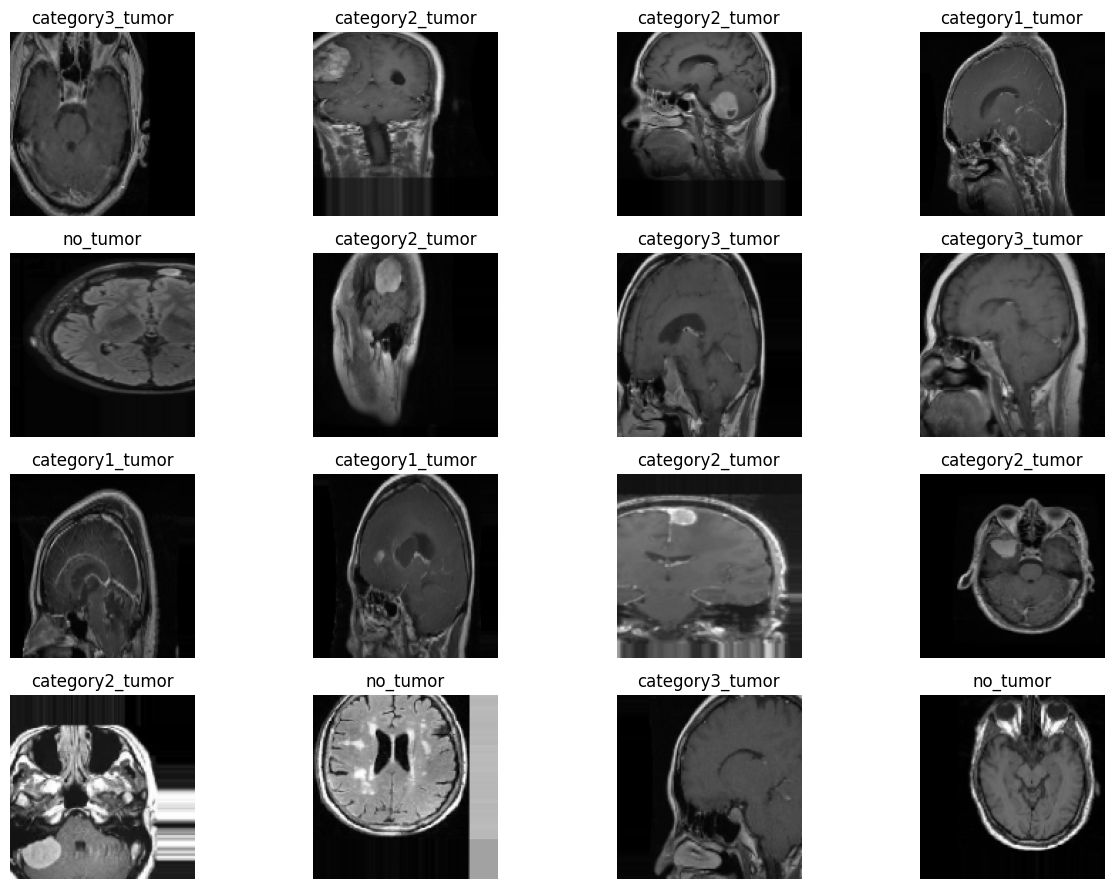

In [ ]:
plotImages(x,y)

In [ ]:
cnn = Sequential([
    # first Layer
    Conv2D(filters=16, kernel_size=(3, 3), padding = 'same', activation='relu', input_shape=(130, 130, 3)),
    MaxPooling2D((2, 2)),
    # second layer
    Conv2D(filters=32, kernel_size=(3, 3), padding = 'same', activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.20),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='relu'),
    Dense(4, activation='softmax')
])

In [ ]:
cnn.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 130, 130, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 65, 65, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 65, 65, 32)        4640      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 flatten_8 (Flatten)         (None, 32768)            

In [ ]:
cnn.compile(loss="categorical_crossentropy",
              optimizer = optimizer, metrics=["accuracy"])

In [ ]:
history = cnn.fit(trainds,validation_data=valds,epochs=100, batch_size=8, verbose=1, callbacks=callbacks)

Epoch 1/100
122/122 [==============================] - ETA: 0s - loss: 1.3716 - accuracy: 0.3127
Epoch 1: val_loss improved from inf to 1.36179, saving model to best_model.h5
122/122 [==============================] - 23s 168ms/step - loss: 1.3716 - accuracy: 0.3127 - val_loss: 1.3618 - val_accuracy: 0.3261 - lr: 1.0000e-04
Epoch 2/100
122/122 [==============================] - ETA: 0s - loss: 1.3389 - accuracy: 0.3715
Epoch 2: val_loss improved from 1.36179 to 1.30860, saving model to best_model.h5
122/122 [==============================] - 20s 167ms/step - loss: 1.3389 - accuracy: 0.3715 - val_loss: 1.3086 - val_accuracy: 0.4127 - lr: 1.0000e-04
Epoch 3/100
122/122 [==============================] - ETA: 0s - loss: 1.2715 - accuracy: 0.4200
Epoch 3: val_loss improved from 1.30860 to 1.24842, saving model to best_model.h5
122/122 [==============================] - 20s 164ms/step - loss: 1.2715 - accuracy: 0.4200 - val_loss: 1.2484 - val_accuracy: 0.4204 - lr: 1.0000e-04
Epoch 4/100
12

In [ ]:
cnn.evaluate(testds)

41/41 [==============================] - 2s 50ms/step - loss: 1.0823 - accuracy: 0.5331


[1.0823214054107666, 0.5331279039382935]

<Figure size 640x480 with 0 Axes>

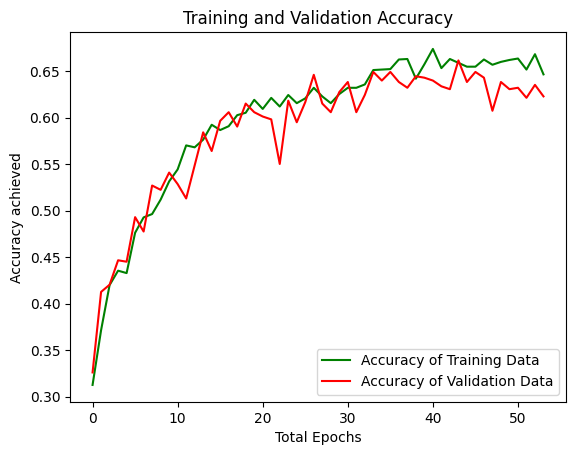

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(len(history.history['accuracy']))
plt.plot(epochs, history.history['accuracy'], 'green', label='Accuracy of Training Data')
plt.plot(epochs, history.history['val_accuracy'], 'red', label='Accuracy of Validation Data')
plt.xlabel('Total Epochs')
plt.ylabel('Accuracy achieved')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()